In [1]:
# analysis of the compiled csv file from month radstat data:
# initial date: 2024/04/??
# last update: 2024/05/03


In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import gaussian_kde

In [44]:
instrument = 'amsua'
channel    = 'ch1'
expid1     = 'CTRL'
expid2     = 'ng_all_infla'
predictor  = 'sym_cld'

In [45]:
fn={}; df={};

for exp in (expid1,expid2):
    fn[exp]= f'/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/compile_radstats/csv_files/{exp}/omf_stats_{instrument}_{channel}.csv'
    df[exp]=pd.read_csv(fn[exp])

In [ ]:
df[expid1].info()

In [46]:
# criterion to screen the data:
# need to decide how much "over land" data should be screen out:

dfs={};
for exp in (expid1, expid2):
    tmpdf = df[exp]
    screen = (tmpdf['fwater'] > 0.99) & (tmpdf['fland'] < 0.01) & (abs(tmpdf['omf_ges']) < 1e3) & (abs(tmpdf['omf_anl']) < 1e3)
    dfs[exp] = tmpdf.loc[screen]
    

In [ ]:
#dfs[expid1].describe()
print('original data size = (', df[expid1].shape[0],',', df[expid2].shape[0],')')
print('after screening    = (', dfs[expid1].shape[0],',', dfs[expid2].shape[0],')')

In [47]:
### region-depedent analysis
# define the regions:
regions=['Global','90S-60S','60S-40S','40S-20S','20S-0','0-20N','20N-40N','40N-60N','60N-90N']

pltdf={}; # plot dataframe

for exp in (expid1, expid2):
    pltdf[exp] = {}  # Initialize the nested dictionary for each experiment
    dftmp    = dfs[exp]
    for rg in regions:
        if rg == 'Global':
            pltdf[exp][rg] = dftmp
        elif rg == '90S-60S':
            pltdf[exp][rg] = dftmp.loc[ (dftmp['lat']<=-60) & (dftmp['lat']>-90) ]
        elif rg == '60S-40S':
            pltdf[exp][rg] = dftmp.loc[ (dftmp['lat']<=-40) & (dftmp['lat']>-60) ]
        elif rg == '40S-20S':
            pltdf[exp][rg] = dftmp.loc[ (dftmp['lat']<=-20) & (dftmp['lat']>-40) ]
        elif rg == '20S-0':
            pltdf[exp][rg] = dftmp.loc[ (dftmp['lat']<=0) & (dftmp['lat']>-20) ]
        elif rg == '0-20N':
            pltdf[exp][rg] = dftmp.loc[ (dftmp['lat']<=20) & (dftmp['lat']>0) ]
        elif rg == '20N-40N':
            pltdf[exp][rg] = dftmp.loc[ (dftmp['lat']<=40) & (dftmp['lat']>20) ]
        elif rg == '40N-60N':
            pltdf[exp][rg] = dftmp.loc[ (dftmp['lat']<=60) & (dftmp['lat']>40) ]
        elif rg == '60N-90N':
            pltdf[exp][rg] = dftmp.loc[ (dftmp['lat']<=90) & (dftmp['lat']>60) ]

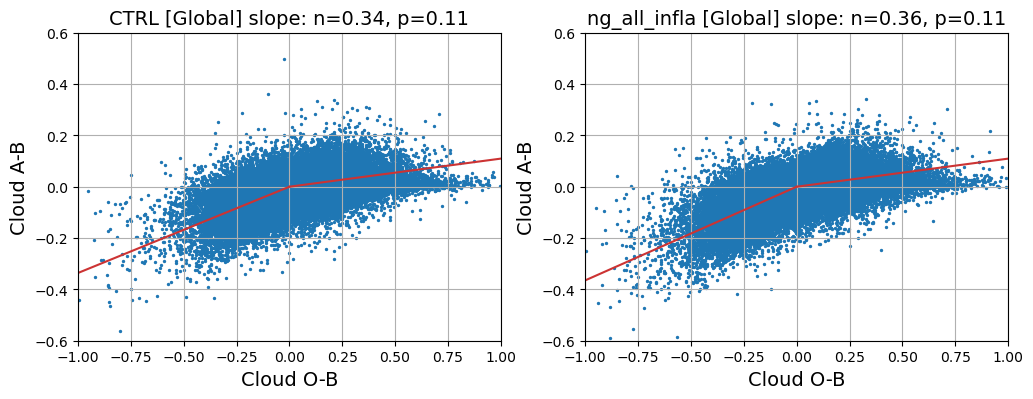

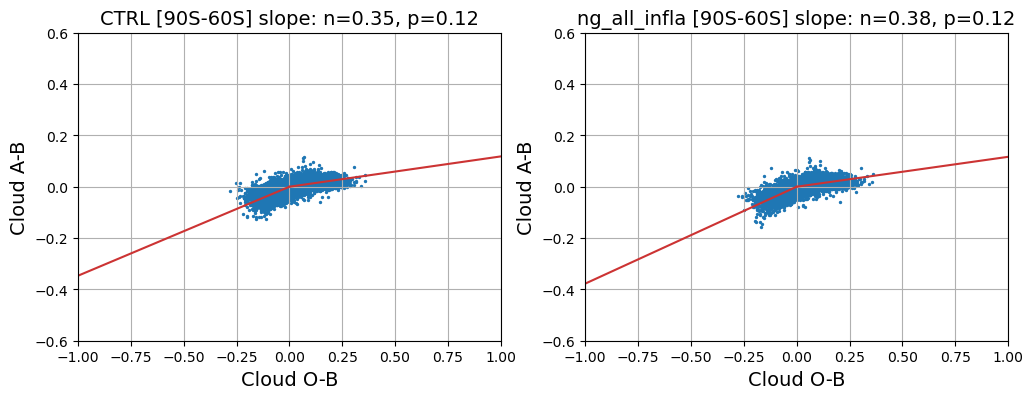

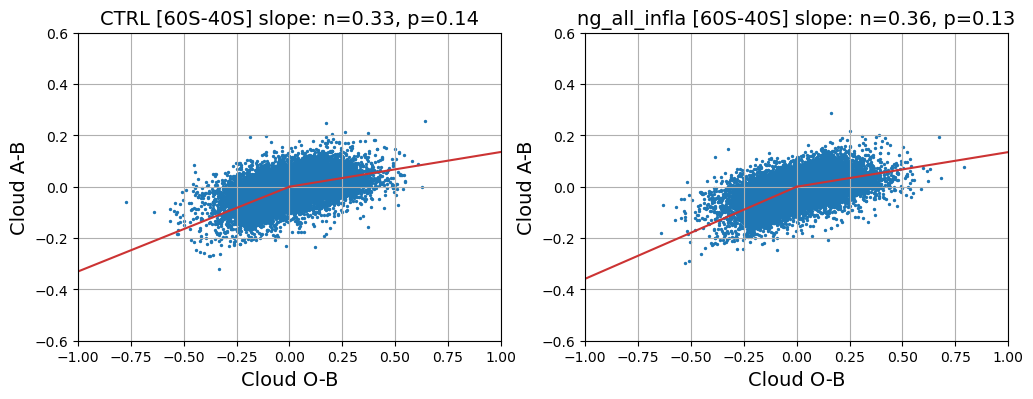

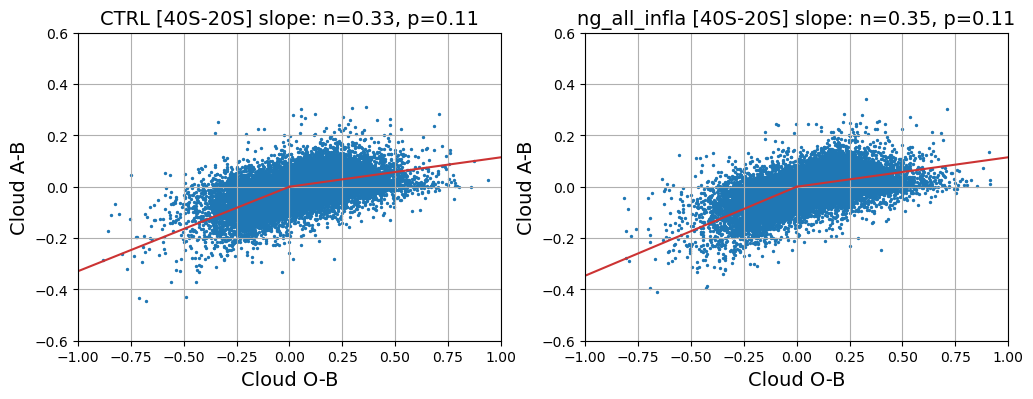

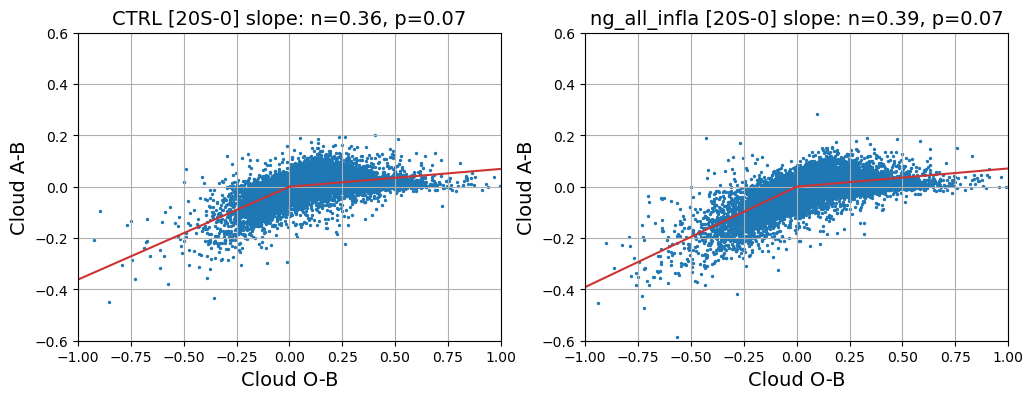

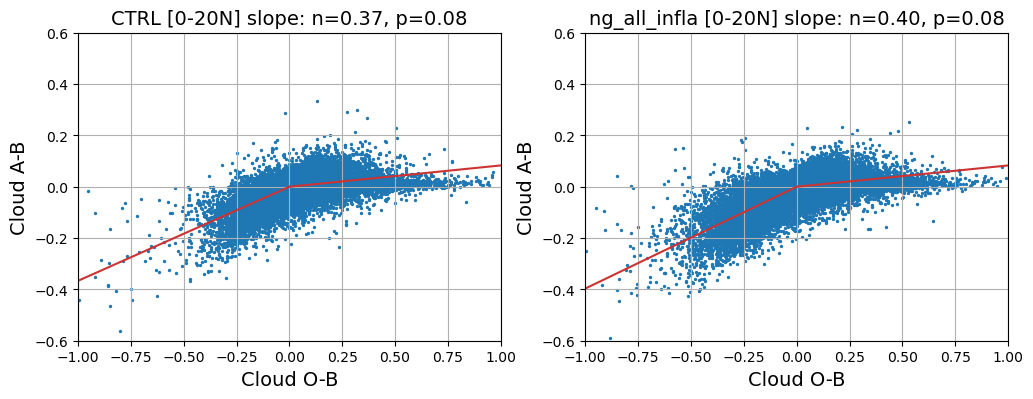

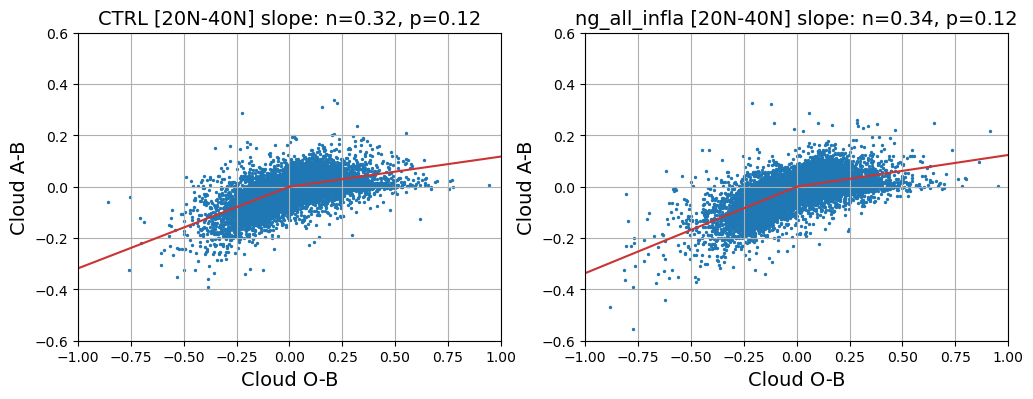

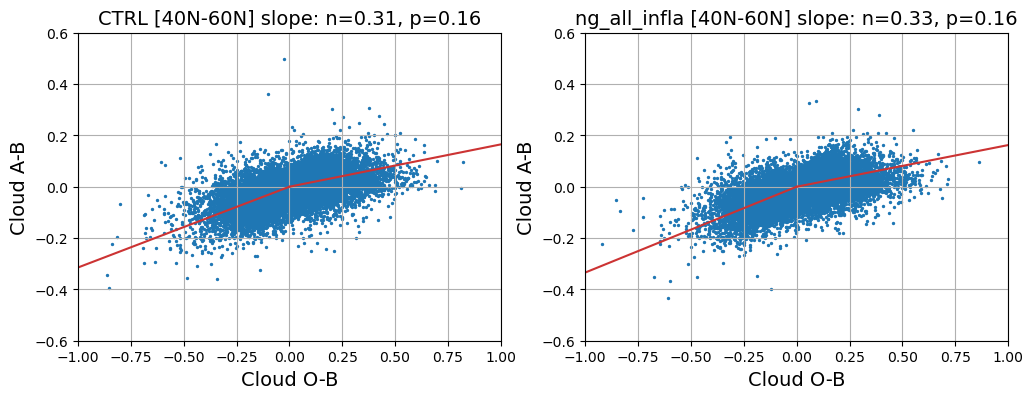

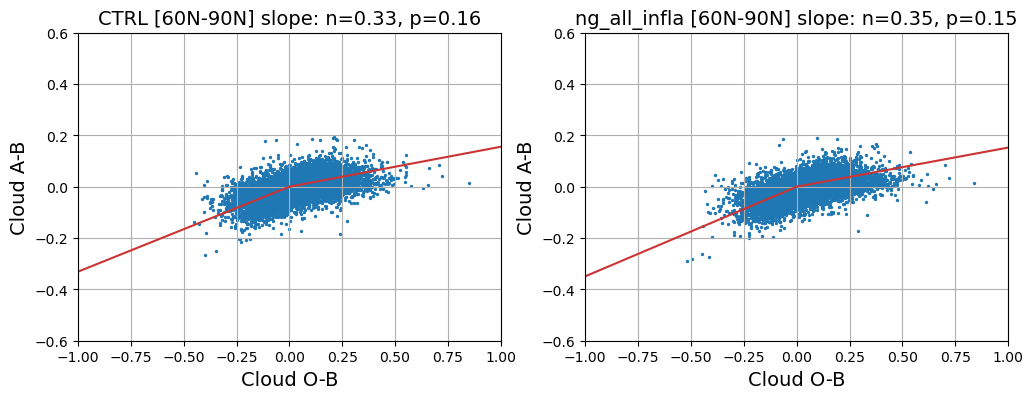

In [48]:
### Cloud increment analysis 
# note that this analysis 'should not' depend on the channel

# record the slope:
slope_pos_record={}; slope_neg_record={}
for exp in (expid1, expid2):
    slope_pos_record[exp]=[]; slope_neg_record[exp]=[];

for rg in regions:
    # figure size:
    fig = plt.figure(figsize=(12,4))
    
    # define the subplots
    ax1 = fig.add_subplot(1, 2, 1)  # Add subplot at position 1
    ax2 = fig.add_subplot(1, 2, 2)  # Add subplot at position 2

    x = pltdf[expid1][rg]['clw_obs'] - pltdf[expid1][rg]['clw_bg_ges']
    y = pltdf[expid1][rg]['clw_bg_anl'] - pltdf[expid1][rg]['clw_bg_ges']
    
    x_pos = x[x>=0]; y_pos = y[x>=0]; slope_pos = np.sum(x_pos*y_pos)/sum(x_pos*x_pos); slope_pos_record[expid1].append(slope_pos);
    x_neg = x[x<=0]; y_neg = y[x<=0]; slope_neg = np.sum(x_neg*y_neg)/sum(x_neg*x_neg); slope_neg_record[expid1].append(slope_neg);

    
    ax1.scatter(x,y,s=2)
    ax1.plot([-1, 0], slope_neg*np.array([-1, 0]), color=(.8, .2, .2))
    ax1.plot([ 0, 1], slope_pos*np.array([ 0, 1]), color=(.8, .2, .2))
    ax1.set_xlim(-1,1)
    ax1.set_ylim(-0.6,0.6)
    ax1.grid(True)
    ax1.set_xlabel('Cloud O-B', fontsize=14)
    ax1.set_ylabel('Cloud A-B', fontsize=14)
    ax1.set_title(f"{expid1} [{rg}] slope: n={slope_neg:.2f}, p={slope_pos:.2f}", fontsize=14)
    
    x = pltdf[expid2][rg]['clw_obs'] - pltdf[expid2][rg]['clw_bg_ges']
    y = pltdf[expid2][rg]['clw_bg_anl'] - pltdf[expid2][rg]['clw_bg_ges']

    x_pos = x[x>=0]; y_pos = y[x>=0]; slope_pos = np.sum(x_pos*y_pos)/sum(x_pos*x_pos); slope_pos_record[expid2].append(slope_pos);
    x_neg = x[x<=0]; y_neg = y[x<=0]; slope_neg = np.sum(x_neg*y_neg)/sum(x_neg*x_neg); slope_neg_record[expid2].append(slope_neg);
    
    ax2.scatter(x,y, s=2)
    ax2.plot([-1, 0], slope_neg*np.array([-1, 0]), color=(.8, .2, .2))
    ax2.plot([ 0, 1], slope_pos*np.array([ 0, 1]), color=(.8, .2, .2))
    ax2.set_xlim(-1,1)
    ax2.set_ylim(-0.6,0.6)
    ax2.grid(True)
    ax2.set_xlabel('Cloud O-B', fontsize=14)
    ax2.set_ylabel('Cloud A-B', fontsize=14)
    ax2.set_title(f"{expid2} [{rg}] slope: n={slope_neg:.2f}, p={slope_pos:.2f}", fontsize=14)
    
    plt.savefig(f'cloud_increment_analysis_{expid1}_{expid2}_{rg}.png', dpi=200, bbox_inches='tight')

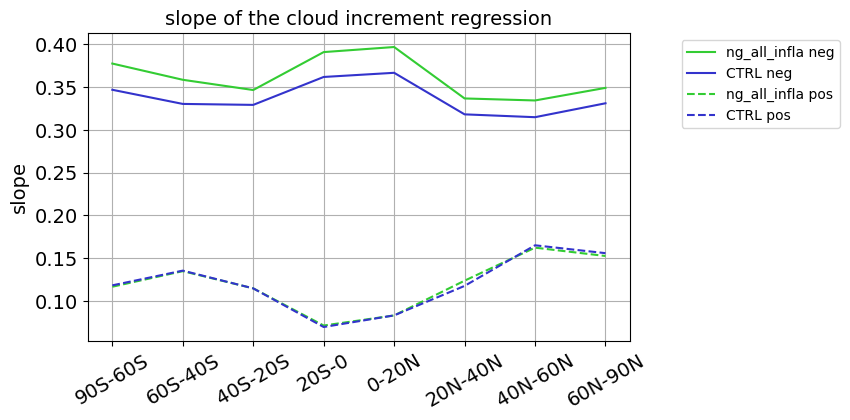

In [49]:
### analysis of the slope

fig = plt.figure(figsize=(7,4))
plt.plot(range(len(regions)-1), slope_neg_record[expid2][1:], linestyle='-' , color=(.2, .8, .2), label=f"{expid2} neg")
plt.plot(range(len(regions)-1), slope_neg_record[expid1][1:], linestyle='-' , color=(.2, .2, .8), label=f"{expid1} neg")
plt.plot(range(len(regions)-1), slope_pos_record[expid2][1:], linestyle='--', color=(.2, .8, .2), label=f"{expid2} pos")
plt.plot(range(len(regions)-1), slope_pos_record[expid1][1:], linestyle='--', color=(.2, .2, .8), label=f"{expid1} pos")
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.xticks(range(len(regions)-1), [rg for i, rg in enumerate(regions) if i > 0],rotation=30, fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('slope', fontsize=14)
plt.grid(True)
plt.title('slope of the cloud increment regression', fontsize=14)

plt.savefig(f'cloud_increment_slope_{expid1}_{expid2}.png', dpi=200, bbox_inches='tight')

/tmp/ipykernel_3833129/3327195487.py:17: RuntimeWarning: divide by zero encountered in log
  ax1.plot(bin_centers, np.log(hist1), label=f'{expid1}')
/tmp/ipykernel_3833129/3327195487.py:18: RuntimeWarning: divide by zero encountered in log
  ax1.plot(bin_centers, np.log(hist2), label=f'{expid2}')
/tmp/ipykernel_3833129/3327195487.py:31: RuntimeWarning: divide by zero encountered in log
  ax2.plot(bin_centers, np.log(hist1), label=f'{expid1}')
/tmp/ipykernel_3833129/3327195487.py:32: RuntimeWarning: divide by zero encountered in log
  ax2.plot(bin_centers, np.log(hist2), label=f'{expid2}')


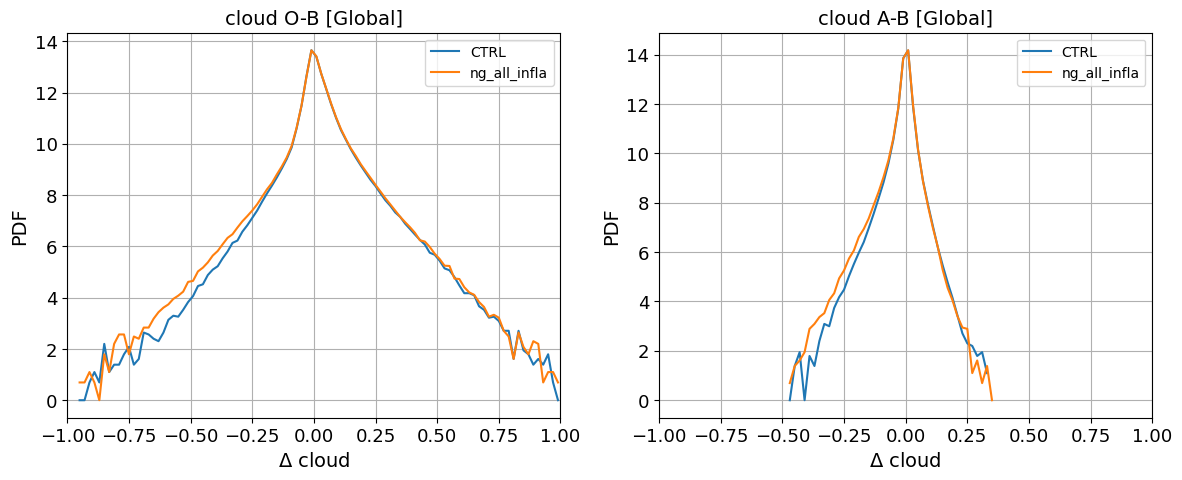

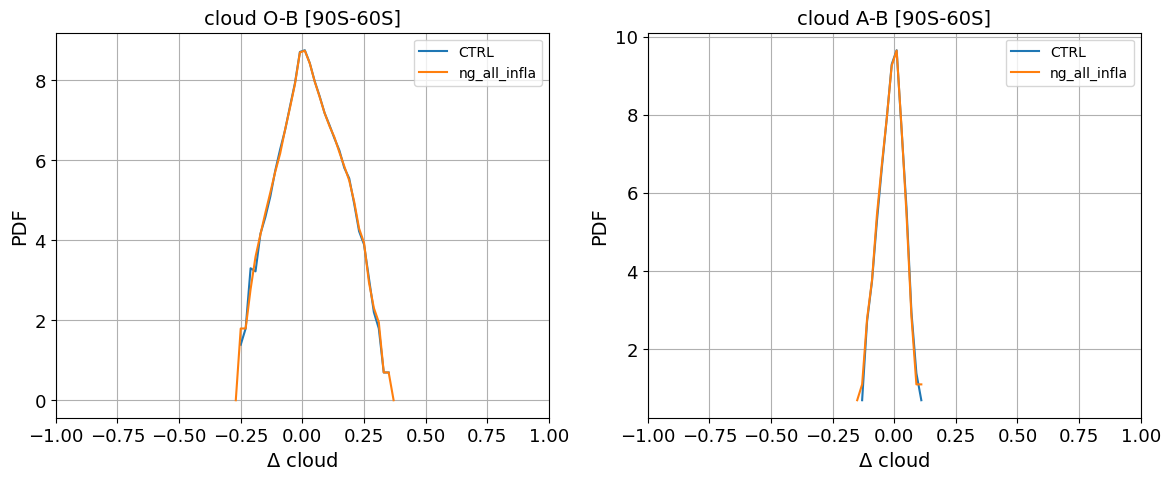

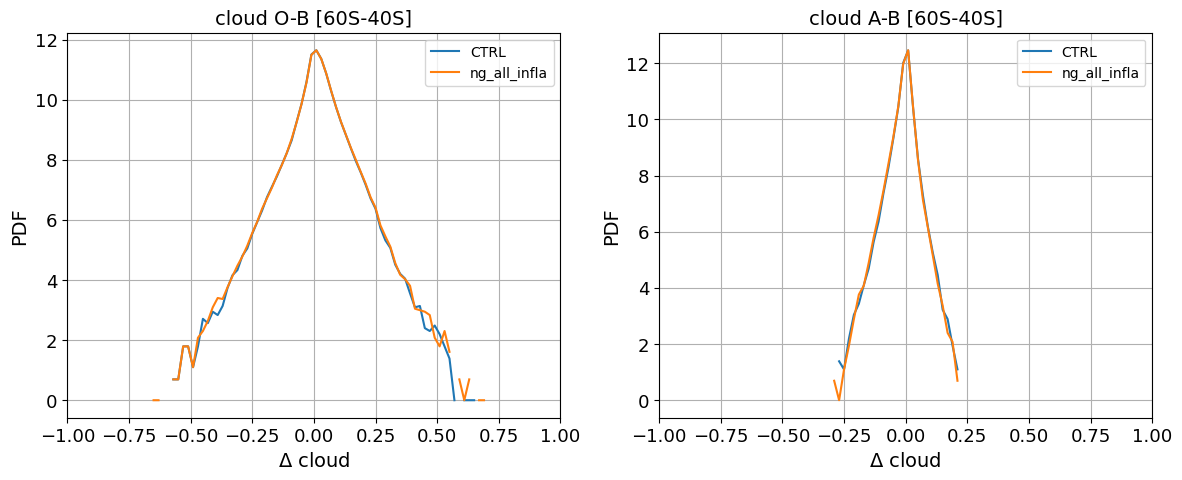

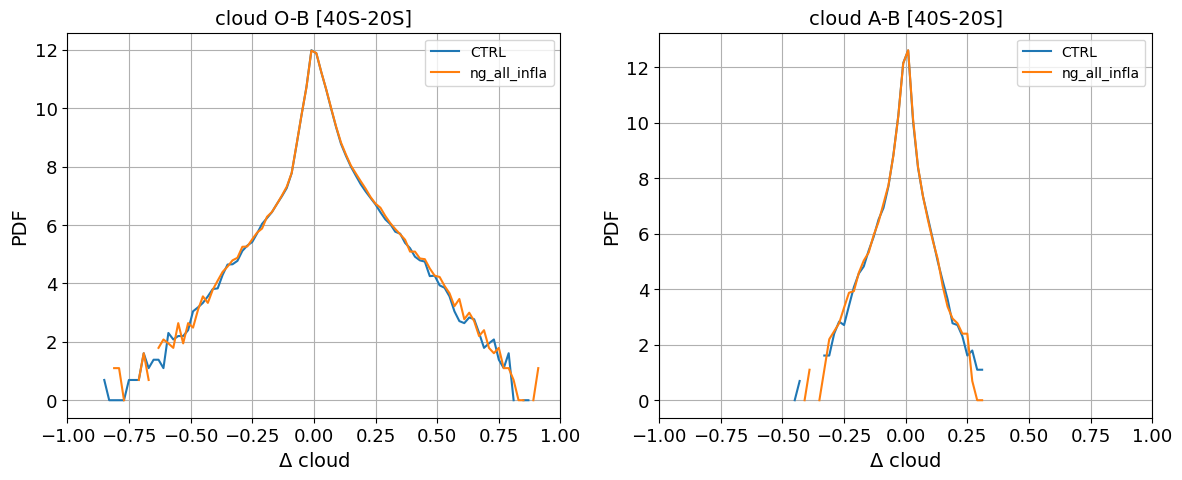

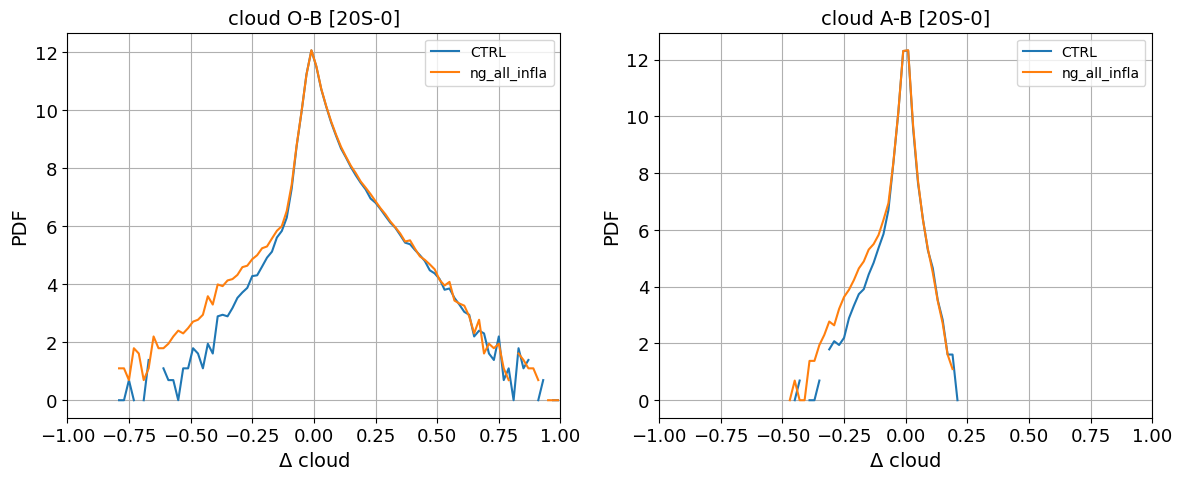

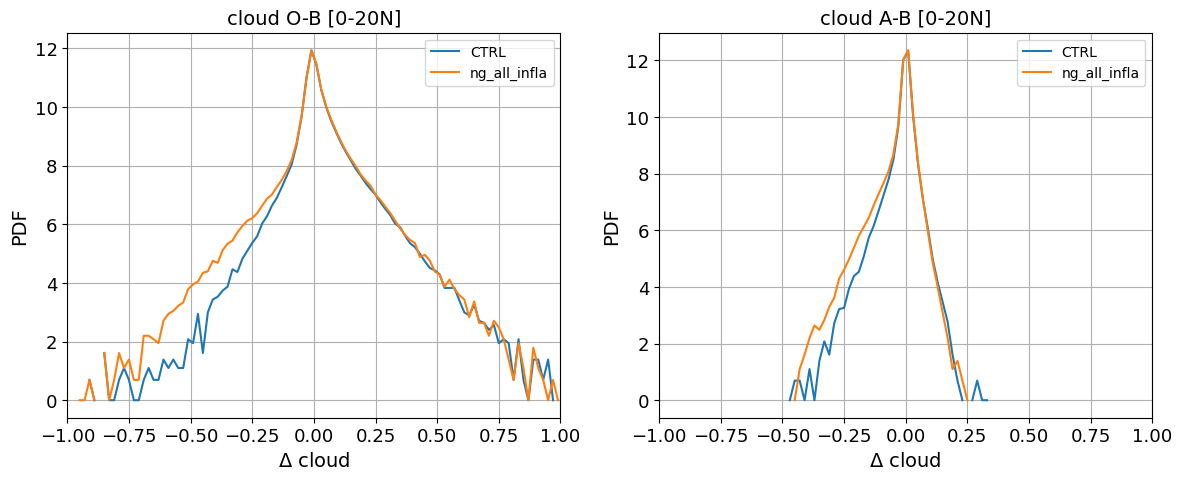

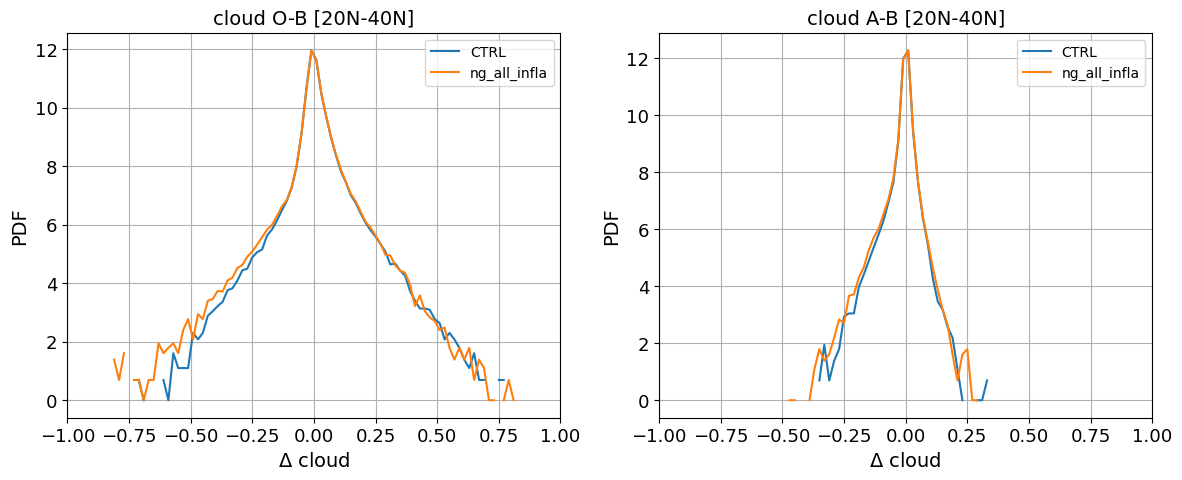

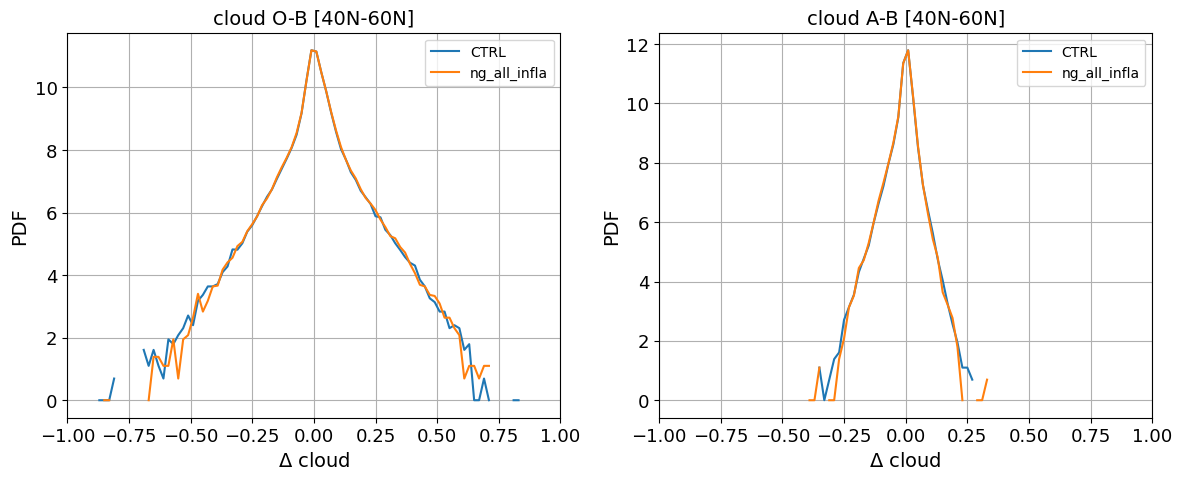

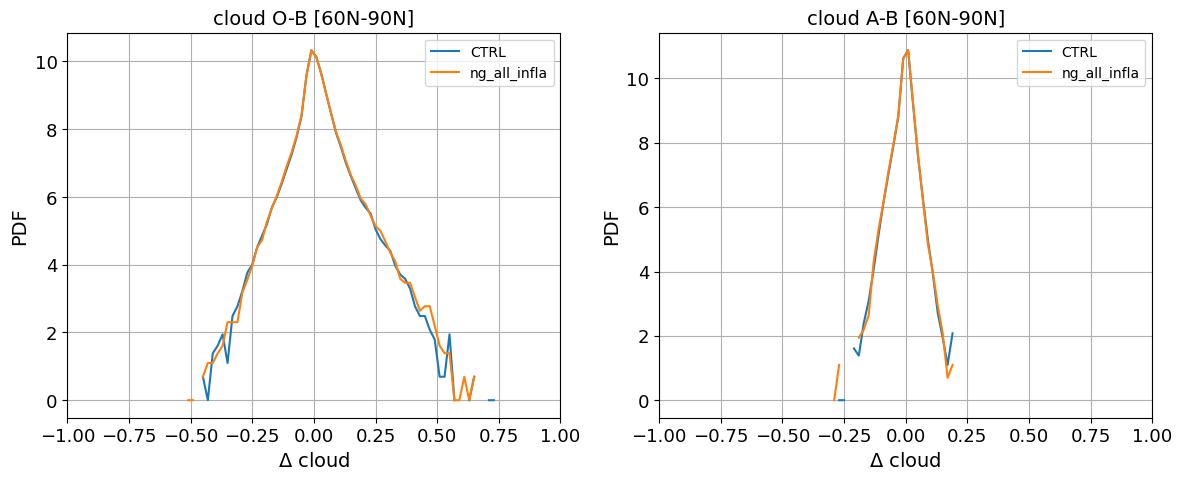

In [50]:
### marginal distribution of Cloud O-B and Cloud A-B

hist_bins   = np.linspace(-1,1,101)
bin_centers = 0.5*(hist_bins[:-1] + hist_bins[1:])


for rg in regions:
    # figure size:
    fig = plt.figure(figsize=(14,5))
    
    # define the subplots
    ax1 = fig.add_subplot(1, 2, 1)  # Add subplot at position 1
    ax2 = fig.add_subplot(1, 2, 2)  # Add subplot at position 2

    hist1, bin_edges = np.histogram(pltdf[expid1][rg]['clw_obs'] - pltdf[expid1][rg]['clw_bg_ges'], bins=hist_bins)
    hist2, bin_edges = np.histogram(pltdf[expid2][rg]['clw_obs'] - pltdf[expid2][rg]['clw_bg_ges'], bins=hist_bins)
    ax1.plot(bin_centers, np.log(hist1), label=f'{expid1}')
    ax1.plot(bin_centers, np.log(hist2), label=f'{expid2}')
    ax1.set_xlim(-1, 1)
    ax1.set_xlabel('$\Delta$ cloud',fontsize=14)
    ax1.set_ylabel('PDF',fontsize=14)
    ax1.tick_params(axis='x', which='major', labelsize=13)
    ax1.tick_params(axis='y', which='major', labelsize=13)
    ax1.grid(True)
    ax1.legend()
    ax1.set_title(f"cloud O-B [{rg}]",fontsize=14)

    hist1, bin_edges = np.histogram(pltdf[expid1][rg]['clw_bg_anl'] - pltdf[expid1][rg]['clw_bg_ges'], bins=hist_bins)
    hist2, bin_edges = np.histogram(pltdf[expid2][rg]['clw_bg_anl'] - pltdf[expid2][rg]['clw_bg_ges'], bins=hist_bins)

    ax2.plot(bin_centers, np.log(hist1), label=f'{expid1}')
    ax2.plot(bin_centers, np.log(hist2), label=f'{expid2}')
    ax2.set_xlim(-1, 1)
    ax2.set_xlabel('$\Delta$ cloud',fontsize=14)
    ax2.set_ylabel('PDF',fontsize=14)
    ax2.tick_params(axis='x', which='major', labelsize=13)
    ax2.tick_params(axis='y', which='major', labelsize=13)
    ax2.grid(True)
    ax2.legend()
    ax2.set_title(f"cloud A-B [{rg}]",fontsize=14)
    
    plt.savefig(f'cloud_increment_marginal_{expid1}_{expid2}_{rg}.png', dpi=200, bbox_inches='tight')

In [ ]:
print(f'{expid1} cloud O-B bias =')
print(np.mean(pltdf[expid1]['clw_obs'] - pltdf[expid1]['clw_bg_ges']))
print(f'{expid2} cloud O-B bias =')
print(np.mean(pltdf[expid2]['clw_obs'] - pltdf[expid2]['clw_bg_ges']))


In [ ]:
# understand the cloud TB relation
for rg in regions:
    plt.scatter(pltdf[expid1][rg]['clw_obs'], pltdf[expid1][rg]['obs'],s=2)
    plt.xlabel('observation cloud')
    plt.ylabel(f'Tb ({instrument}-{channel})')
    plt.xlim(0,1)
    #plt.ylim(135,250)
    plt.grid(True)
    plt.title(f"{instrument}-{channel} [{rg}]")
    plt.show()


In [ ]:
# channel omf analysis

# record the slope:
slope_pos_record={}; slope_neg_record={}
for exp in (expid1, expid2):
    slope_pos_record[exp]=[]; slope_neg_record[exp]=[];

for rg in regions:
    test_range  = np.max(np.abs(pltdf[expid1][rg]['omf_ges']))

    # figure size:
    fig = plt.figure(figsize=(14,5))
    
    # define the subplots
    ax1 = fig.add_subplot(1, 2, 1)  # Add subplot at position 1
    ax2 = fig.add_subplot(1, 2, 2)  # Add subplot at position 2

    x = pltdf[expid1][rg]['omf_ges']
    y = pltdf[expid1][rg]['omf_ges'] - pltdf[expid1][rg]['omf_anl']
    
    x_pos = x[x>=0]; y_pos = y[x>=0]; slope_pos = np.sum(x_pos*y_pos)/sum(x_pos*x_pos); slope_pos_record[expid1].append(slope_pos);
    x_neg = x[x<=0]; y_neg = y[x<=0]; slope_neg = np.sum(x_neg*y_neg)/sum(x_neg*x_neg); slope_neg_record[expid1].append(slope_neg);

    
    ax1.scatter(x,y,s=2)
    ax1.plot([-1, 0], slope_neg*np.array([-1, 0]), color=(.8, .2, .2))
    ax1.plot([ 0, 1], slope_pos*np.array([ 0, 1]), color=(.8, .2, .2))
    ax1.grid(True)
    ax1.set_xlim(-test_range, test_range)
    ax1.set_xlabel('Tb O-B')
    ax1.set_ylabel('Tb A-B')
    ax1.set_title(f"{instrument} {channel} {expid1} [{rg}] slope: n={slope_neg:.2f}, p={slope_pos:.2f}")
    
    x = pltdf[expid2][rg]['omf_ges']
    y = pltdf[expid2][rg]['omf_ges'] - pltdf[expid2][rg]['omf_anl']

    x_pos = x[x>=0]; y_pos = y[x>=0]; slope_pos = np.sum(x_pos*y_pos)/sum(x_pos*x_pos); slope_pos_record[expid2].append(slope_pos);
    x_neg = x[x<=0]; y_neg = y[x<=0]; slope_neg = np.sum(x_neg*y_neg)/sum(x_neg*x_neg); slope_neg_record[expid2].append(slope_neg);
    
    ax2.scatter(x,y, s=2)
    ax2.plot([-1, 0], slope_neg*np.array([-1, 0]), color=(.8, .2, .2))
    ax2.plot([ 0, 1], slope_pos*np.array([ 0, 1]), color=(.8, .2, .2))
    ax2.grid(True)
    ax2.set_xlim(-test_range, test_range)
    ax2.set_xlabel('Tb O-B')
    ax2.set_ylabel('Tb A-B')
    ax2.set_title(f"{instrument} {channel} {expid2} [{rg}] slope: n={slope_neg:.2f}, p={slope_pos:.2f}")

In [ ]:
# analysis of the slope

plt.plot(range(len(regions)-1), np.abs(slope_neg_record[expid2][1:]), linestyle='-' , color=(.2, .8, .2), label=f"{expid2} neg")
plt.plot(range(len(regions)-1), np.abs(slope_neg_record[expid1][1:]), linestyle='-' , color=(.2, .2, .8), label=f"{expid1} neg")
plt.plot(range(len(regions)-1), np.abs(slope_pos_record[expid2][1:]), linestyle='--', color=(.2, .8, .2), label=f"{expid2} pos")
plt.plot(range(len(regions)-1), np.abs(slope_pos_record[expid1][1:]), linestyle='--', color=(.2, .2, .8), label=f"{expid1} pos")
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.xticks(range(len(regions)-1), [rg for i, rg in enumerate(regions) if i > 0],rotation=30)
plt.ylabel('slope')
plt.grid(True)

In [ ]:
# marginal distribution of omf & amf


for rg in regions:
    test_range  = np.max(np.abs(pltdf[expid1][rg]['omf_ges']))
    hist_bins   = np.linspace(-test_range,test_range,101)
    bin_centers = 0.5*(hist_bins[:-1] + hist_bins[1:])
    
    # figure size:
    fig = plt.figure(figsize=(14,5))
    
    # define the subplots
    ax1 = fig.add_subplot(1, 2, 1)  # Add subplot at position 1
    ax2 = fig.add_subplot(1, 2, 2)  # Add subplot at position 2

    hist1, bin_edges = np.histogram(pltdf[expid1][rg]['omf_ges'], bins=hist_bins, density=True)
    hist2, bin_edges = np.histogram(pltdf[expid2][rg]['omf_ges'], bins=hist_bins, density=True)
    ax1.plot(bin_centers, np.log(hist1), label=f'{expid1}')
    ax1.plot(bin_centers, np.log(hist2), label=f'{expid2}')
    ax1.set_xlim(-test_range, test_range)
    ax1.grid(True)
    ax1.legend()
    ax1.set_title(f"O-B [{rg}] {expid1}={np.mean(pltdf[expid1][rg]['omf_ges']):.2f} {expid2}={np.mean(pltdf[expid2][rg]['omf_ges']):.2f}")

    hist1, bin_edges = np.histogram(pltdf[expid1][rg]['omf_ges'] - pltdf[expid1][rg]['omf_anl'], bins=hist_bins, density=True)
    hist2, bin_edges = np.histogram(pltdf[expid2][rg]['omf_ges'] - pltdf[expid2][rg]['omf_anl'], bins=hist_bins, density=True)

    ax2.plot(bin_centers, np.log(hist1), label=f'{expid1}')
    ax2.plot(bin_centers, np.log(hist2), label=f'{expid2}')
    ax2.set_xlim(-test_range, test_range)
    ax2.grid(True)
    ax2.legend()
    ax2.set_title(f"A-B [{rg}] {expid1}={np.mean(pltdf[expid1][rg]['omf_ges'] - pltdf[expid1][rg]['omf_anl']):.2f} \
    {expid2}={np.mean(pltdf[expid2][rg]['omf_ges'] - pltdf[expid2][rg]['omf_anl']):.2f}")

In [ ]:
print(np.max(np.abs(pltdf[expid1][rg]['omf_ges'])))

In [ ]:
# error analysis:
fig = plt.figure(figsize=(7,6))

#tmpx = pltdf[expid2]['omf_ges']
tmpx = pltdf[expid2]['Global']['clw_obs'] - pltdf[expid2]['Global']['clw_bg_ges']
tmpy = pltdf[expid2]['Global']['errinv_ges']

plt.scatter(tmpx, 1/tmpy, s=2, color=(0.3,0.3,0.9), alpha=0.01, label=f'{expid2}')

#tmpx = pltdf[expid1]['omf_ges']
tmpx = pltdf[expid1]['Global']['clw_obs'] - pltdf[expid1]['Global']['clw_bg_ges']
tmpy = pltdf[expid1]['Global']['errinv_ges']

plt.scatter(tmpx, 1/tmpy, s=2, color=(0.3,0.9,0.3), alpha=0.01, label=f'{expid1}')

plt.grid(True)
plt.legend()
plt.xlim(-1,1)
plt.ylim(0,15)
plt.xlabel('cloud O-B')
plt.ylabel('final stdev (K)')


In [ ]:
print(np.linspace(-1,1,21))

In [ ]:
# cloud increment plot

# figure size:
fig = plt.figure(figsize=(14,5))

# define the subplots
ax1 = fig.add_subplot(1, 2, 1)  # Add subplot at position 1
ax2 = fig.add_subplot(1, 2, 2)  # Add subplot at position 2

ax1.scatter(dfs[expid1]['clw_obs'] - dfs[expid1]['clw_bg_ges'], dfs[expid1]['clw_bg_anl'] - dfs[expid1]['clw_bg_ges'], s=2)
ax1.set_xlim(-1,1)
ax1.set_ylim(-0.6,0.6)
ax1.grid(True)
ax1.set_xlabel('Cloud O-B')
ax1.set_ylabel('Cloud A-B')
ax1.set_title(f"{expid1}")

ax2.scatter(dfs[expid2]['clw_obs'] - dfs[expid2]['clw_bg_ges'], dfs[expid2]['clw_bg_anl'] - dfs[expid2]['clw_bg_ges'], s=2)
ax2.set_xlim(-1,1)
ax2.set_ylim(-0.6,0.6)
ax2.grid(True)
ax2.set_xlabel('Cloud O-B')
ax2.set_ylabel('Cloud A-B')
ax2.set_title(f"{expid2}")


In [ ]:
# criterion used to select data:

# need to decide how much "over land" data should be screen out:
land_sea_screen = (fwater > 0.99) & (fland < 0.01) & (abs(omf) < 1e3)
land_screen     = (fland >= 0.01 ) & (abs(omf) < 1e3)

screen = land_sea_screen
#screen = land_screen

lat_s        = lat[screen]
lon_s        = lon[screen]
fland_s      = fland[screen]
fwater_s     = fwater[screen]

obs_s        = obs[screen]
omf_s        = omf[screen]
oma_s        = oma[screen]
clw_obs_s    = clw_obs[screen]
clw_bkg_s    = clw_bkg[screen]
clw_anl_s    = clw_anl[screen]
symerr_bkg_s = symerr_bkg[screen]
symerr_anl_s = symerr_anl[screen]
inverr_bkg_s = inverr_bkg[screen]
inverr_anl_s = inverr_anl[screen]


print("original data size = ",len(omf))
print("screened data size = ",len(omf_s))

In [ ]:
# have a look at the smallest 1000 and largest 1000 omf:
plt.plot(np.sort(omf_screen)[:1000])
plt.show()
plt.plot(np.sort(omf_screen)[-1000:])
plt.show()

In [ ]:
# categorize data into different bins based on latitude
#_edge = np.arange(-90,90+30,30)
_edge=np.array([-90, -60, -40, -20, 20, 40, 60, 90])

n_cat      = len(_edge)-1  # number of bins

# inflation factor for the diagnosed bin-width
inflation = 3

idx_cat  = [] # the index of the cloud samples in each cat
size_cat = [] # the sample size in each cat
omf_cat  = [] # the corresponding omf
dx_diag_cat   = [] # the diagnosed optimal binwidth for each cat
dx_actual_cat = [] # the actually used binwidth for each cat
axis_omf_cat  = [] # the x-axis for the histogram defined in each cat 
hist_omf_cat  = [] # the density of the histogram
stdev_cat     = [] # the standard deviation of each cat
mean_cat      = [] # the mean of each cat

clwdiff_cat = [] # the corresponding clw diff 
hist_clwdiff_cat = [] # the corresponding clw diff 

for i in range(n_cat):
    print("processing the ",i+1,"-th bin...")
    
    #idx_cat.append( np.where( (lat_screen>=_edge[i])&(lat_screen<_edge[i+1]) ) )
    idx_cat.append( np.where( (lat_screen>=_edge[i])&(lat_screen<_edge[i+1])&(clw_sym_screen>0.3) ) )
    #idx_cat.append( np.where( (lat_screen>=_edge[i])&(lat_screen<_edge[i+1])&(abs(clw_diff_screen)>0.05) ) )

    
    # define the x-axis for the histogram of omf in each cat
    # first define dx (using IQR):
    omf_cat.append( omf_screen[idx_cat[i]] )
    clwdiff_cat.append( clw_diff_screen[idx_cat[i]] )
    
    q1 = np.percentile(omf_cat[i], 25)
    q3 = np.percentile(omf_cat[i], 75)
    size_cat.append( len(idx_cat[i][0]) )
    dx_diag_cat.append( 2*(q3-q1)/size_cat[i]**(1/3))
    dx_actual_cat.append( np.ceil(inflation*dx_diag_cat[i]/domf_init)*domf_init )
    stdev_cat.append(np.std(omf_cat[i]))
    mean_cat.append(np.mean(omf_cat[i]))

    # determine the max/min value based on the above dx
    max_val = (np.ceil(max(omf_screen)/dx_actual_cat[i])+5)*dx_actual_cat[i]
    min_val = (np.floor(min(omf_screen)/dx_actual_cat[i])-5)*dx_actual_cat[i]
    axis_omf_cat.append(np.arange(min_val, max_val+dx_actual_cat[i], dx_actual_cat[i]))
    
    # generate the histogram
    hist, bin_edges = np.histogram(omf_cat[i], bins=axis_omf_cat[i], density=True)
    hist_omf_cat.append(hist)

    hist, bin_edges = np.histogram(clwdiff_cat[i], bins=np.arange(-1,1+0.05, 0.05), density=True)
    hist_clwdiff_cat.append(hist)
    
    # summary statistics:
    print("for cloud amount = [",_edge[i],",",_edge[i+1],"]")
    print("the size of this cat = ", size_cat[i])
    print("mean of this cat = ",  mean_cat[i] )
    print("stdev of this cat = ", stdev_cat[i])
    #print("min omf screen = ", min(omf_screen))
    print("dx_actual_cat = ", dx_actual_cat[i])
    #print("min value = ", min_val)
    #print("max value = ", max_val)
    print(" ")
#print("diagnosed binwidth = ", dx_diag_cat)
#print("actual binwdith = ", dx_actual_cat)

In [ ]:
# quick analysis

for i in range(n_cat):
    fig = plt.figure(figsize=(14,5))
    # define the subplots
    ax1 = fig.add_subplot(1, 2, 1)  # Add subplot at position 1
    ax2 = fig.add_subplot(1, 2, 2)  # Add subplot at position 2

    #hist, bin_edges = np.histogram(omf_cat[i], bins=axis_omf_cat[i], density=True)
    #bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])

    bin_centers = 0.5*(axis_omf_cat[i][:-1] + axis_omf_cat[i][1:])
    ax1.plot(bin_centers, hist_omf_cat[i], label='pdf of Omf', linewidth=3)
    ax1.axvline(x=0, color='black', linestyle='--', label='Vertical Line at x=0')
    ax1.grid(True)
    #ax1.set_xlim(-30,30)
    ax1.set_xlim(-6,6)
    ax1.set_xlabel('omf (K)')
    ax1.set_title(f'range = [{_edge[i]}, {_edge[i+1]}] sample size = {size_cat[i]}')
    
    bin_centers = np.arange(-0.975,0.975+0.05, 0.05)
    ax2.plot(bin_centers, hist_clwdiff_cat[i], label='pdf of cloud diff', linewidth=3)
    ax2.axvline(x=0, color='black', linestyle='--', label='Vertical Line at x=0')
    ax2.grid(True)
    ax2.set_xlim(-0.8,0.8)
    ax2.set_xlabel('cloud difference')
    ax2.set_title(f'range = [{_edge[i]}, {_edge[i+1]}]')
    
    plt.show()

In [ ]:
plt.scatter(clw_diff_screen, omf_screen)

In [ ]:
plt.hist(lat_screen)

In [ ]:
# manually collect dataset into categories based on the symmetric cloud amount:
# define the edges used for the histogram
dcloud     = 0.05 
domf_init  = 0.05 # a first-guess d(omf)

# please refer to
# /scratch2/GFDL/gfdlscr/Chih-Chi.Hu/SHiELD/shield_workflow/fix/fix_gsi/cloudy_radiance_info_shield.txt
# to determine how to categorize the cloud bin

if predictor in ('obs_cld','sym_cld'):
    if instrument == 'amsua':
        if channel in ('ch1','ch2','ch3','ch4'):
            cloud_edge = np.array([0.00, 0.03, \
                                   0.06, 0.10, \
                                   0.15, 0.20, \
                                   0.25, 0.30, \
                                   0.35, 1.00 ])
        elif channel in ('ch5'):
            cloud_edge = np.array([0.00, 0.03, \
                                   0.06, 0.10, \
                                   0.15, 0.20, \
                                   0.25, 0.30, \
                                   0.35, 0.40, 1.00])
        elif channel in ('ch15'):
            cloud_edge = np.array([0.00, 0.03, \
                                   0.06, 0.10, \
                                   0.15, 0.20, \
                                   0.25, 1.00])
    elif instrument == 'atms':
        if channel in ('ch1','ch2','ch3','ch4','ch5','ch16'):
            cloud_edge = np.array([0.00, 0.03, \
                                   0.06, 0.10, \
                                   0.15, 0.20, \
                                   0.25, 0.30, \
                                   0.35, 1.00 ]) 
        elif channel in ('ch6','ch18'):
            cloud_edge = np.array([0.00, 0.03, \
                                   0.06, 0.10, \
                                   0.15, 0.20, \
                                   0.25, 0.30, \
                                   0.35, 0.40, \
                                   0.45, 1.00])
        elif channel in ('ch17'):
            cloud_edge = np.array([0.00, 0.03, \
                                   0.06, 0.10, \
                                   0.15, 0.20, \
                                   0.25, 0.30, 1.00])
        elif channel in ('ch19','ch20','ch21','ch22'):
            cloud_edge = np.array([0.00, 0.03, \
                                   0.06, 0.10, \
                                   0.15, 0.20, \
                                   0.25, 0.30, \
                                   0.35, 0.40, \
                                   0.55, 1.00])
            
elif predictor == 'no_predictor':
    cloud_edge = np.array([0.00, 1.00])

#cloud_edge = np.array([0.00, 0.03, 0.06, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 1.00])

n_cat      = len(cloud_edge)-1  # number of cloud bins

# inflation factor for the diagnosed bin-width
inflation = 3

idx_cat  = [] # the index of the cloud samples in each cat
size_cat = [] # the sample size in each cat
omf_cat  = [] # the corresponding omf
dx_diag_cat   = [] # the diagnosed optimal binwidth for each cat
dx_actual_cat = [] # the actually used binwidth for each cat
axis_omf_cat  = [] # the x-axis for the histogram defined in each cat 
hist_omf_cat  = [] # the density of the histogram
stdev_cat     = [] # the standard deviation of each cat
mean_cat      = [] # the mean of each cat

for i in range(n_cat):
    print("processing the ",i+1,"-th cloud bin...")
    #idx_cat.append( np.where( (clw_diff_screen>=cloud_edge[i])&(clw_diff_screen<cloud_edge[i+1]) ) )
    if predictor== 'sym_cld':
        idx_cat.append( np.where( (clw_sym_screen>=cloud_edge[i])&(clw_sym_screen<cloud_edge[i+1]) ) )
    elif predictor == 'obs_cld':
        idx_cat.append( np.where( (clw_obs_screen>=cloud_edge[i])&(clw_obs_screen<cloud_edge[i+1]) ) )
    elif predictor == 'no_predictor':
        idx_cat.append( np.where( (clw_obs_screen>=cloud_edge[i])&(clw_obs_screen<cloud_edge[i+1]) ) )

    #idx_cat.append( np.where( (clw_bg_screen>=cloud_edge[i])&(clw_bg_screen<cloud_edge[i+1]) ) )
    
    # define the x-axis for the histogram of omf in each cat
    # first define dx (using IQR):
    omf_cat.append( omf_screen[idx_cat[i]] )
    q1 = np.percentile(omf_cat[i], 25)
    q3 = np.percentile(omf_cat[i], 75)
    size_cat.append( len(idx_cat[i][0]) )
    dx_diag_cat.append( 2*(q3-q1)/size_cat[i]**(1/3))
    dx_actual_cat.append( np.ceil(inflation*dx_diag_cat[i]/domf_init)*domf_init )
    stdev_cat.append(np.std(omf_cat[i]))
    mean_cat.append(np.mean(omf_cat[i]))

    # determine the max/min value based on the above dx
    max_val = (np.ceil(max(omf_screen)/dx_actual_cat[i])+5)*dx_actual_cat[i]
    min_val = (np.floor(min(omf_screen)/dx_actual_cat[i])-5)*dx_actual_cat[i]
    axis_omf_cat.append(np.arange(min_val, max_val+dx_actual_cat[i], dx_actual_cat[i]))
    
    # generate the histogram
    hist, bin_edges = np.histogram(omf_cat[i], bins=axis_omf_cat[i], density=True)
    hist_omf_cat.append(hist)
    
    # summary statistics:
    print("for cloud amount = [",cloud_edge[i],",",cloud_edge[i+1],"]")
    print("the size of this cat = ", size_cat[i])
    print("mean of this cat = ",  mean_cat[i] )
    print("stdev of this cat = ", stdev_cat[i])
    #print("min omf screen = ", min(omf_screen))
    print("dx_actual_cat = ", dx_actual_cat[i])
    #print("min value = ", min_val)
    #print("max value = ", max_val)
    print(" ")
#print("diagnosed binwidth = ", dx_diag_cat)
#print("actual binwdith = ", dx_actual_cat)